In [2]:
import cv2
import numpy as np
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
from matplotlib import pyplot as plt



What is PyTorch?
================

It’s a Python-based scientific computing package targeted at two sets of
audiences:

-  A replacement for NumPy to use the power of GPUs
-  a deep learning research platform that provides maximum flexibility
   and speed

Getting Started
---------------

Tensors
^^^^^^^

Tensors are similar to NumPy’s ndarrays, with the addition being that
Tensors can also be used on a GPU to accelerate computing.

** Here are some high frequency operations you should get used to **

In [ ]:
from __future__ import print_function
import torch

### Construct a 5x3 matrix, uninitialized using [torch.empty]()

In [ ]:
x = torch.empty(5, 3)
print(x)

### Construct a randomly initialized matrix using [torch.rand](https://pytorch.org/docs/stable/torch.html#torch.rand)

Look at the documentation and see if you can make a 10,100 array or random numbers
<details>
<summary>Answer</summary>
<p> torch.rand(10,100)</p></details>


In [ ]:
x = Fill me in
print(x)

### Print out the size of a tensor.  
you will be doing this frequently if developing/debuggin a neural network

In [ ]:
x.size()

### Construct a matrix filled zeros and of dtype floating point 16.  Here is a link to available [types](https://pytorch.org/docs/stable/tensor_attributes.html#torch.torch.dtype)

Can you change long to floating point16 below
<details>
<summary>Hint</summary>
<p> torch.zeros(5, 3, dtype=torch.float16) </p></details>



In [ ]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

### Element operations

do an element wise add of A and B

In [ ]:
A = torch.rand(5, 3)
B = torch.rand(5, 3)

print(A)
print(B)
print(A + B)

### Alternate method using torch.add

In [ ]:
print(torch.add(A, B))

### Addition: providing an output tensor as argument

In [ ]:
result = torch.empty(5, 3)
torch.add(A, B, out=result)
print(result)

### Addition: in-place



In [ ]:
#### adds x to y
B.add_(A)
print(B)

<div class="alert alert-info"><h4>Note</h4><p>Any operation that mutates a tensor in-place is post-fixed with an ``_``.
    For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.</p></div>


### Matrix Multiply


In [18]:
a = torch.randint(4,(2,3))
b = torch.randint(4,(3,2))
print(a)
print(b)

tensor([[0, 0, 1],
        [0, 2, 1]])
tensor([[1, 1],
        [3, 3],
        [0, 1]])


In [19]:
# 2x3 @ 3x2 ~ 2x2
a.matmul(b)
torch.matmul(a,b)

tensor([[0, 1],
        [6, 7]])

### Create a onehot vector


In [40]:

batch_size = 5
nb_digits = 10
# Dummy input that HAS to be 2D for the scatter (you can use view(-1,1) if needed)
y = torch.LongTensor(batch_size,1).random_() % nb_digits
# One hot encoding buffer that you create out of the loop and just keep reusing
y_onehot = torch.FloatTensor(batch_size, nb_digits)

# In your for loop
y_onehot.zero_()
y_onehot.scatter_(1, y, 1)

print(y)
print(y_onehot)

tensor([[ 8],
        [ 1],
        [ 4],
        [ 5],
        [ 7]])
tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]])


### Use argmax to grab the index of the highest value

In [21]:
A = torch.rand(3,4,5)
print(A)
A.argmax(dim=2)

tensor([[[0.4791, 0.6427, 0.4850, 0.8918, 0.5046],
         [0.3802, 0.1974, 0.8807, 0.3322, 0.3854],
         [0.1450, 0.6710, 0.1567, 0.8760, 0.7838],
         [0.9900, 0.4326, 0.6907, 0.3431, 0.7704]],

        [[0.6741, 0.7869, 0.0707, 0.4947, 0.5580],
         [0.4630, 0.4901, 0.9552, 0.2336, 0.9802],
         [0.4147, 0.4719, 0.8765, 0.7198, 0.9070],
         [0.8264, 0.2374, 0.0944, 0.4895, 0.1953]],

        [[0.9034, 0.9578, 0.1266, 0.4522, 0.4032],
         [0.2456, 0.0185, 0.1444, 0.8930, 0.6270],
         [0.8786, 0.2491, 0.2291, 0.0037, 0.8230],
         [0.9096, 0.9918, 0.5614, 0.6948, 0.9402]]])


tensor([[3, 2, 3, 0],
        [1, 4, 4, 0],
        [1, 3, 0, 1]])

### You can use standard NumPy-like indexing with all bells and whistles!

Example Grab the middle column of A (index = 1)

In [41]:
A = torch.rand(3,3)
print(A)
print(A[:, 1])

tensor([[ 0.0591,  0.6838,  0.4621],
        [ 0.7117,  0.8484,  0.3358],
        [ 0.4537,  0.3042,  0.0450]])
tensor([ 0.6838,  0.8484,  0.3042])


### Resizing: If you want to resize/reshape tensor, you can use ``torch.view``:



In [ ]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

### If you have a one element tensor, use ``.item()`` to get the value as a
Python number



In [ ]:
x = torch.randn(1)
print(x)
print(x.item())

**Read later:**


  100+ Tensor operations, including transposing, indexing, slicing,
  mathematical operations, linear algebra, random numbers, etc.,
  are described
  `here <http://pytorch.org/docs/torch>`_.



NumPy Bridge
------------

Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

The Torch Tensor and NumPy array will share their underlying memory
locations, and changing one will change the other.

### Converting a Torch Tensor to a NumPy Array


In [ ]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

### See how the numpy array changed in value. 

In [ ]:
a.add_(1)
print(a)
print(b)

Converting NumPy Array to Torch Tensor
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
See how changing the np array changed the Torch Tensor automatically



In [ ]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

All the Tensors on the CPU except a CharTensor support converting to
NumPy and back.

CUDA Tensors
------------

Tensors can be moved onto any device using the ``.to`` method.



In [17]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
x = torch.rand(2,2,2)
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([[[1.5508, 1.0580],
         [1.6207, 1.1363]],

        [[1.9148, 1.6978],
         [1.5459, 1.5224]]], device='cuda:0')
tensor([[[1.5508, 1.0580],
         [1.6207, 1.1363]],

        [[1.9148, 1.6978],
         [1.5459, 1.5224]]], dtype=torch.float64)


### ND Tensors
When working with neural networks, you are always dealing with multidimensional arrays.  Here are some quick tricks
#### Assume A is a 32x32 RGB image


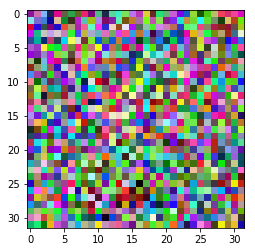

In [7]:
## 3D Tensors
import torch
A = torch.rand(32,32,3)
plt.imshow(A)

### Slicing Tensors  - grab 'RED' dimension

In [15]:
red_data = A[:,:,0] #0 represents the first channel of RGB
red_data.size()

torch.Size([32, 32])

### Swap the RGB dimension and make the tensor a 3x32x32 tensor

In [11]:
A_rgb_first = A.permute(2,0,1)
print(A_rgb_first.size())

torch.Size([3, 32, 32])


### Add a BatchSize to our Image Tensor
Usually you need to do this to run inference on your trained model

In [20]:
Anew = A.unsqueeze(0)
print(Anew.size())


torch.Size([1, 32, 32, 3])
torch.Size([32, 32, 3])


### Drop the tensor dimension.  

sometimes like in the example above, you might have a tensor with on of the dimensions equal to one.  Use **squeeze()** to drop that dimension>

In [25]:
print(Anew.squeeze(0).size())

torch.Size([32, 32, 3])
